### Visualizing regression models
- https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial
- https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS
- https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html
- https://stackoverflow.com/questions/38836465/how-to-get-the-regression-intercept-using-statsmodels-api
- https://stackoverflow.com/questions/36400419/how-to-calculate-the-99-confidence-interval-for-the-slope-in-a-linear-regressio

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
sns.set(font_scale=1.5)

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips['intercept'] = 1

In [4]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,intercept
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1


In [5]:
tips.shape

(244, 8)

<Figure size 576x576 with 0 Axes>

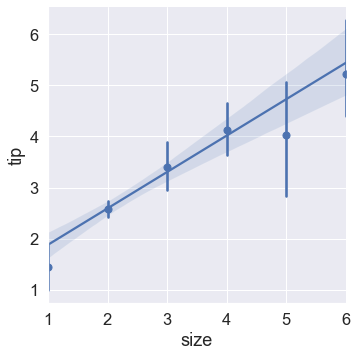

In [6]:
plt.figure(figsize=(8, 8))
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

#### Fit regression model
- https://www.statsmodels.org/stable/regression.html
- https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html

In [7]:
mod = sm.OLS(tips['tip'], tips.loc[:, ['intercept', 'size']])  # add 1 as intercept column to fit `intercept` of regression model
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     76.18
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           4.30e-16
Time:                        21:40:41   Log-Likelihood:                -391.56
No. Observations:                 244   AIC:                             787.1
Df Residuals:                     242   BIC:                             794.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1691      0.223      5.233      0.000       0.729       1.609
size           0.7118      0.082      8.728      0.000       0.551       0.872
==============================================================================
Omnibus:                       81.369   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.339
Skew:                           1.393   Prob(JB):                     4.42e-60
Kurtosis:                       7.373   Cond. No.                         8.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Confidence interval of estimated parmaeters
- https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.conf_int.html

In [8]:
ci_sd = res.conf_int(0.32)  # 68%, +/- SD
ci_sd

,0,1
intercept,0.946499,1.391767
size,0.630548,0.793093


In [9]:
ci_2sd = res.conf_int(0.05)  # 95%, +/- 2*SD
ci_2sd

,0,1
intercept,0.729047,1.609219
size,0.551168,0.872474


Same as $z_{\alpha=0.025} * \text{std_err}$

In [10]:
stats.norm.isf(0.025)

1.9599639845400545

In [11]:
0.7118 + 1.96 * 0.082  # same as fai(2.58) * std_err of corresponding parameter

0.87252

#### Fit regression model by sk-learn

In [12]:
x = tips['size'].values.reshape(-1, 1)
y = tips['tip'].values.reshape(-1, 1)
reg = LinearRegression().fit(x, y)
reg.score(x, y)  # R^2

0.2394132914419278

In [13]:
corr = np.corrcoef(tips['size'], tips['tip'])
corr[0, 1]**2  # same as corr^2

0.23941329144192816

In [14]:
x1 = np.linspace(0, 7, 8)
y1 = x1 * reg.coef_[0][0] + reg.intercept_
y_lower_bound_sd = x1 * ci_sd.iloc[1, 0] + ci_sd.iloc[0, 0]
y_upper_bound_sd = x1 * ci_sd.iloc[1, 1] + ci_sd.iloc[0, 1]
y_lower_bound_2sd = x1 * ci_2sd.iloc[1, 0] + ci_2sd.iloc[0, 0]
y_upper_bound_2sd = x1 * ci_2sd.iloc[1, 1] + ci_2sd.iloc[0, 1]

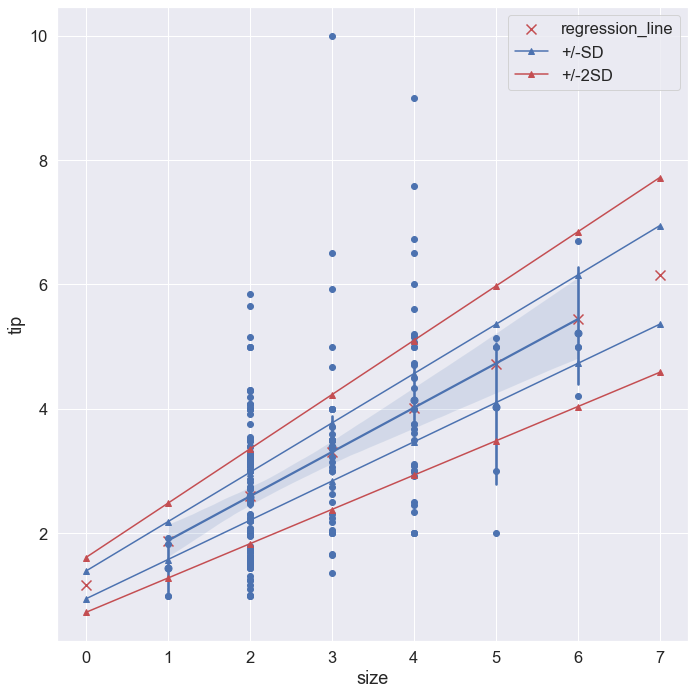

In [15]:
# plt.figure(figsize=(15, 15))
f, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x="size", y="tip", data=tips, x_estimator=np.mean, ax=ax)
plt.scatter(x1, y1, c='r', marker='x', label='regression_line', s=100)
plt.scatter(x, y)

plt.plot(x1, y_lower_bound_sd, c='b', marker='^', label='+/-SD')
plt.plot(x1, y_upper_bound_sd, c='b', marker='^')
plt.plot(x1, y_lower_bound_2sd, c='r', marker='^', label='+/-2SD')
plt.plot(x1, y_upper_bound_2sd, c='r', marker='^')
plt.legend()
plt.tight_layout()
plt.savefig('reg_model_vis.png', dpi=200)